In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
original = pd.read_csv('Data_Test.csv', sep = ';')
df = original.copy()

In [49]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                  0
edad                                0
trabajo                             0
estado_civil                        0
educacion                           0
deuda                               0
saldo                               0
vivienda                            0
prestamo                            0
tipo_contacto                    1233
duracion                            0
fecha_contacto                      0
campaign                            0
tiempo_transcurrido                 0
contactos_anteriores                0
resultado_campanas_anteriores    3494
target                              0
dtype: int64

In [50]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

In [51]:
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')

In [52]:
df.sample(5)

ID  edad        trabajo estado_civil              educacion deuda  \
766   50767    33      housemaid       casado               priamria    no   
4353  54354    67        retired       casado               priamria    no   
2900  52901    37  self-employed       casado  secundaria/superiores    no   
3271  53272    53    blue-collar       casado  secundaria/superiores    no   
4261  54262    46       services       casado  secundaria/superiores    no   

      saldo vivienda prestamo    tipo_contacto  duracion fecha_contacto  \
766     212       si       no            movil       260    11-jul-2021   
4353   2301       no       no            movil       124    16-apr-2021   
2900    215       si       no  Sin Información        61     6-jun-2021   
3271   2231       si       no            movil       272    14-jul-2021   
4261      4       no       no            movil       268    30-apr-2021   

      campaign  tiempo_transcurrido  contactos_anteriores  \
766          2                   -1                     0   
4353         1                   -1                     0   
2900         1                   -1                     0   
3271         3                   -1                     0   
4261         1                  261                     5   

     resultado_campanas_anteriores target  
766                Sin Información     no  
4353               Sin Información     no  
2900               Sin Información     no  
3271               Sin Información     no  
4261                          otro     si

In [53]:
df_train = df.copy()
df_train.sample(3)

ID  edad      trabajo estado_civil              educacion deuda  \
1280  51281    37  blue-collar      soltero               priamria    no   
2155  52156    28   management      soltero  secundaria/superiores    no   
3219  53220    45  blue-collar   divorciado               priamria    no   

      saldo vivienda prestamo tipo_contacto  duracion fecha_contacto  \
1280    851       si       no         movil       151    15-may-2021   
2155   1633       no       no         movil       275     5-jun-2021   
3219    942       no       no         movil       362    21-nov-2021   

      campaign  tiempo_transcurrido  contactos_anteriores  \
1280         1                  352                     1   
2155         1                   -1                     0   
3219         1                   -1                     0   

     resultado_campanas_anteriores target  
1280                     sin_exito     no  
2155               Sin Información     si  
3219               Sin Información     no

In [54]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

edad     trabajo estado_civil              educacion deuda  saldo  \
52      27  technician      soltero         universitarios    no    808   
3497    30  management      soltero         universitarios    no    149   
216     36  technician       casado  secundaria/superiores    no    146   

     vivienda prestamo    tipo_contacto  duracion  campaign  \
52         si       no            movil       578         1   
3497       si       no  Sin Información       220         2   
216        si       si  Sin Información       284         2   

      tiempo_transcurrido  contactos_anteriores resultado_campanas_anteriores  \
52                    364                     1                          otro   
3497                   -1                     0               Sin Información   
216                    -1                     0               Sin Información   

     target  
52       no  
3497     no  
216      no

In [55]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(4255, 39)


edad  saldo  duracion  campaign  tiempo_transcurrido  \
2767    41    -29        41         2                  266   
3749    43   2886       230         1                   -1   
3758    41   3355       181         2                  500   
2782    29   1448       217         1                  184   
1068    26    170       129         1                   -1   

      contactos_anteriores  trabajo_admin.  trabajo_blue-collar  \
2767                     2             0.0                  0.0   
3749                     0             0.0                  0.0   
3758                     1             0.0                  0.0   
2782                     7             1.0                  0.0   
1068                     0             0.0                  0.0   

      trabajo_entrepreneur  trabajo_housemaid  ...  prestamo_si  \
2767                   0.0                0.0  ...          0.0   
3749                   0.0                0.0  ...          0.0   
3758                   0.0                0.0  ...          0.0   
2782                   0.0                0.0  ...          0.0   
1068                   0.0                0.0  ...          0.0   

      tipo_contacto_Sin Información  tipo_contacto_fijo  tipo_contacto_movil  \
2767                            0.0                 0.0                  1.0   
3749                            0.0                 0.0                  1.0   
3758                            0.0                 0.0                  1.0   
2782                            0.0                 0.0                  1.0   
1068                            0.0                 0.0                  1.0   

      resultado_campanas_anteriores_Sin Información  \
2767                                            0.0   
3749                                            1.0   
3758                                            0.0   
2782                                            0.0   
1068                                            1.0   

      resultado_campanas_anteriores_exito  resultado_campanas_anteriores_otro  \
2767                                  0.0                                 0.0   
3749                                  0.0                                 0.0   
3758                                  0.0                                 0.0   
2782                                  0.0                                 1.0   
1068                                  0.0                                 0.0   

      resultado_campanas_anteriores_sin_exito  target_no  target_si  
2767                                      1.0        1.0        0.0  
3749                                      0.0        1.0        0.0  
3758                                      1.0        1.0        0.0  
2782                                      0.0        1.0        0.0  
1068                                      0.0        0.0        1.0  

[5 rows x 39 columns]

In [56]:
df_train.columns

Index(['edad', 'saldo', 'duracion', 'campaign', 'tiempo_transcurrido',
       'contactos_anteriores', 'trabajo_admin.', 'trabajo_blue-collar',
       'trabajo_entrepreneur', 'trabajo_housemaid', 'trabajo_management',
       'trabajo_retired', 'trabajo_self-employed', 'trabajo_services',
       'trabajo_student', 'trabajo_technician', 'trabajo_unemployed',
       'trabajo_unknown', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_soltero', 'educacion_priamria',
       'educacion_secundaria/superiores', 'educacion_universitarios',
       'deuda_no', 'deuda_si', 'vivienda_no', 'vivienda_si', 'prestamo_no',
       'prestamo_si', 'tipo_contacto_Sin Información', 'tipo_contacto_fijo',
       'tipo_contacto_movil', 'resultado_campanas_anteriores_Sin Información',
       'resultado_campanas_anteriores_exito',
       'resultado_campanas_anteriores_otro',
       'resultado_campanas_anteriores_sin_exito', 'target_no', 'target_si'],
      dtype='object')

In [57]:
# Estandarización controlada
dades=df_train.drop(columns=['target_no', 'target_si'],inplace=False)
estandarizador = StandardScaler()
dades_std=estandarizador.fit_transform(dades)

**CLUSTER**

In [58]:
k_means = KMeans (n_clusters=5, random_state=42)

df_train['Grupos'] = k_means.fit_predict(dades_std)

In [59]:
df_train['Grupos'].value_counts()

Grupos
2    1982
1     937
3     648
4     575
0     113
Name: count, dtype: int64

In [60]:
df_train[df_train['Grupos'] == 4]

edad  saldo  duracion  campaign  tiempo_transcurrido  \
0       51  -2082       123         6                   -1   
21      34   1386       185         6                   -1   
31      34    247       193         5                   -1   
33      53    105        74         2                   -1   
34      27     15       177         1                   -1   
...    ...    ...       ...       ...                  ...   
4237    42   2030       196         1                   -1   
4238    57    839       225         1                   -1   
4240    31      0       144         2                   -1   
4245    48   1159      1181         9                   -1   
4254    28      0       380         4                   -1   

      contactos_anteriores  trabajo_admin.  trabajo_blue-collar  \
0                        0             0.0                  0.0   
21                       0             0.0                  0.0   
31                       0             0.0                  1.0   
33                       0             1.0                  0.0   
34                       0             1.0                  0.0   
...                    ...             ...                  ...   
4237                     0             0.0                  0.0   
4238                     0             0.0                  0.0   
4240                     0             1.0                  0.0   
4245                     0             0.0                  1.0   
4254                     0             0.0                  1.0   

      trabajo_entrepreneur  trabajo_housemaid  ...  \
0                      1.0                0.0  ...   
21                     0.0                0.0  ...   
31                     0.0                0.0  ...   
33                     0.0                0.0  ...   
34                     0.0                0.0  ...   
...                    ...                ...  ...   
4237                   0.0                0.0  ...   
4238                   0.0                0.0  ...   
4240                   0.0                0.0  ...   
4245                   0.0                0.0  ...   
4254                   0.0                0.0  ...   

      tipo_contacto_Sin Información  tipo_contacto_fijo  tipo_contacto_movil  \
0                               0.0                 0.0                  1.0   
21                              1.0                 0.0                  0.0   
31                              1.0                 0.0                  0.0   
33                              0.0                 0.0                  1.0   
34                              0.0                 0.0                  1.0   
...                             ...                 ...                  ...   
4237                            0.0                 0.0                  1.0   
4238                            1.0                 0.0                  0.0   
4240                            1.0                 0.0                  0.0   
4245                            0.0                 0.0                  1.0   
4254                            1.0                 0.0                  0.0   

      resultado_campanas_anteriores_Sin Información  \
0                                               1.0   
21                                              1.0   
31                                              1.0   
33                                              1.0   
34                                              1.0   
...                                             ...   
4237                                            1.0   
4238                                            1.0   
4240                                            1.0   
4245                                            1.0   
4254                                            1.0   

      resultado_campanas_anteriores_exito  resultado_campanas_anteriores_otro  \
0                                     0.0                                 0.0   
21                     

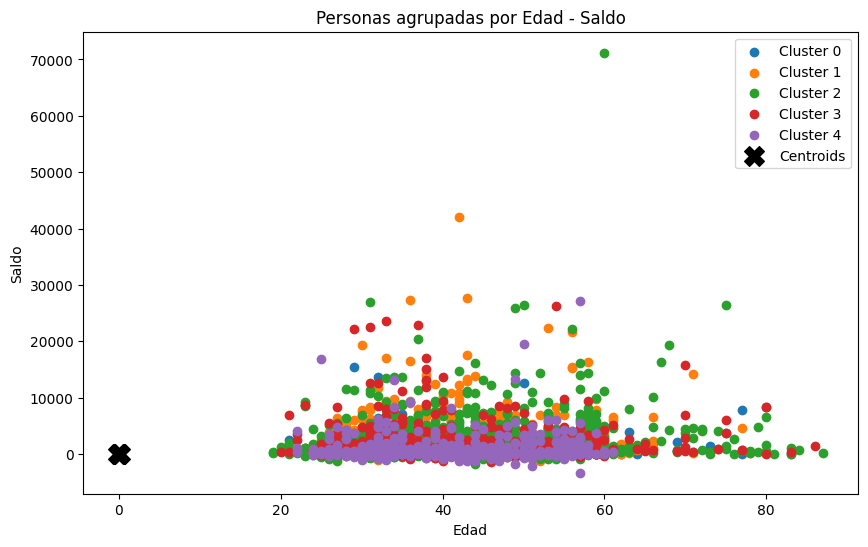

In [61]:
numero_clusters = 5
plt.figure(figsize=(10, 6))
for cluster in range(numero_clusters):
    cluster_data = df_train[df_train['Grupos'] == cluster]
    plt.scatter(cluster_data['edad'], cluster_data['saldo'], label=f'Cluster {cluster}')
plt.scatter(k_means.cluster_centers_[:, 9], k_means.cluster_centers_[:, 8], s=200, c='black', marker='X', label='Centroids')

plt.title('Personas agrupadas por Edad - Saldo')
plt.xlabel('Edad')
plt.ylabel('Saldo')
plt.legend()
plt.show()

In [62]:
grupo_2 = df_train[df_train['Grupos'] == 1]

In [63]:
grupo_2 = grupo_2[grupo_2['saldo'] >= 5000]
grupo_2

edad  saldo  duracion  campaign  tiempo_transcurrido  \
60      30   6619       239         8                   -1   
125     30  19358       258         2                   -1   
135     40  10378       523         3                   -1   
187     42  42045       205         2                   -1   
346     33   9449       428         1                   -1   
...    ...    ...       ...       ...                  ...   
3922    40  10786       111         3                   -1   
3980    30   6495        78         3                   -1   
4150    39   5803        83         3                   -1   
4195    30   6164       152        11                   -1   
4201    38  12877       118         3                   -1   

      contactos_anteriores  trabajo_admin.  trabajo_blue-collar  \
60                       0             0.0                  0.0   
125                      0             0.0                  0.0   
135                      0             0.0                  0.0   
187                      0             0.0                  0.0   
346                      0             0.0                  0.0   
...                    ...             ...                  ...   
3922                     0             0.0                  0.0   
3980                     0             0.0                  0.0   
4150                     0             0.0                  0.0   
4195                     0             0.0                  0.0   
4201                     0             0.0                  0.0   

      trabajo_entrepreneur  trabajo_housemaid  ...  \
60                     0.0                0.0  ...   
125                    0.0                0.0  ...   
135                    0.0                0.0  ...   
187                    1.0                0.0  ...   
346                    0.0                0.0  ...   
...                    ...                ...  ...   
3922                   0.0                0.0  ...   
3980                   0.0                0.0  ...   
4150                   0.0                0.0  ...   
4195                   0.0                0.0  ...   
4201                   0.0                0.0  ...   

      tipo_contacto_Sin Información  tipo_contacto_fijo  tipo_contacto_movil  \
60                              0.0                 0.0                  1.0   
125                             0.0                 0.0                  1.0   
135                             0.0                 0.0                  1.0   
187                             0.0                 0.0                  1.0   
346                             0.0                 0.0                  1.0   
...                             ...                 ...                  ...   
3922                            1.0                 0.0                  0.0   
3980                            0.0                 0.0                  1.0   
4150                            0.0                 0.0                  1.0   
4195                            1.0                 0.0                  0.0   
4201                            1.0                 0.0                  0.0   

      resultado_campanas_anteriores_Sin Información  \
60                                              1.0   
125                                             1.0   
135                                             1.0   
187                                             1.0   
346                                             1.0   
...                                             ...   
3922                                            1.0   
3980                                            1.0   
4150                                            1.0   
4195                                            1.0   
4201                                            1.0   

      resultado_campanas_anteriores_exito  resultado_campanas_anteriores_otro  \
60                                    0.0                                 0.0   
125                    

In [69]:
df_train.columns

Index(['edad', 'saldo', 'duracion', 'campaign', 'tiempo_transcurrido',
       'contactos_anteriores', 'trabajo_admin.', 'trabajo_blue-collar',
       'trabajo_entrepreneur', 'trabajo_housemaid', 'trabajo_management',
       'trabajo_retired', 'trabajo_self-employed', 'trabajo_services',
       'trabajo_student', 'trabajo_technician', 'trabajo_unemployed',
       'trabajo_unknown', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_soltero', 'educacion_priamria',
       'educacion_secundaria/superiores', 'educacion_universitarios',
       'deuda_no', 'deuda_si', 'vivienda_no', 'vivienda_si', 'prestamo_no',
       'prestamo_si', 'tipo_contacto_Sin Información', 'tipo_contacto_fijo',
       'tipo_contacto_movil', 'resultado_campanas_anteriores_Sin Información',
       'resultado_campanas_anteriores_exito',
       'resultado_campanas_anteriores_otro',
       'resultado_campanas_anteriores_sin_exito', 'target_no', 'target_si',
       'Grupos'],
      dtype='object')

In [65]:
grupo_2 = grupo_2[grupo_2['vivienda_si'] == 0]

In [70]:
grupo_2 = grupo_2[grupo_2['edad'] <= 60]

In [72]:
grupo_2.sample(5)

edad  saldo  duracion  campaign  tiempo_transcurrido  \
3837    38  14058       293        20                   -1   
933     41   6563       136         8                   -1   
1237    37   6968       175         1                   -1   
2911    48   9207       445         3                   -1   
808     35   8647       140         2                   -1   

      contactos_anteriores  trabajo_admin.  trabajo_blue-collar  \
3837                     0             0.0                  1.0   
933                      0             0.0                  0.0   
1237                     0             0.0                  0.0   
2911                     0             0.0                  0.0   
808                      0             0.0                  0.0   

      trabajo_entrepreneur  trabajo_housemaid  ...  \
3837                   0.0                0.0  ...   
933                    0.0                0.0  ...   
1237                   0.0                0.0  ...   
2911                   0.0                0.0  ...   
808                    0.0                0.0  ...   

      tipo_contacto_Sin Información  tipo_contacto_fijo  tipo_contacto_movil  \
3837                            0.0                 1.0                  0.0   
933                             0.0                 0.0                  1.0   
1237                            0.0                 0.0                  1.0   
2911                            0.0                 0.0                  1.0   
808                             0.0                 0.0                  1.0   

      resultado_campanas_anteriores_Sin Información  \
3837                                            1.0   
933                                             1.0   
1237                                            1.0   
2911                                            1.0   
808                                             1.0   

      resultado_campanas_anteriores_exito  resultado_campanas_anteriores_otro  \
3837                                  0.0                                 0.0   
933                                   0.0                                 0.0   
1237                                  0.0                                 0.0   
2911                                  0.0                                 0.0   
808                                   0.0                                 0.0   

      resultado_campanas_anteriores_sin_exito  target_no  target_si  Grupos  
3837                                      0.0        1.0        0.0       1  
933                                       0.0        1.0        0.0       1  
1237                                      0.0        1.0        0.0       1  
2911                                      0.0        1.0        0.0       1  
808                                       0.0        1.0        0.0       1  

[5 rows x 40 columns]

In [79]:
a = grupo_2.value_counts().sum()
print(f'Hay exactamente en la Data de TEST {a} personas: \n\n - SI que tienen vivienda \n - Tienen MÁS de 5.000 euros de saldo \n - Menores de 60 años   ')

Hay exactamente en la Data de TEST 54 personas: 

 - SI que tienen vivienda 
 - Tienen MÁS de 5.000 euros de saldo 
 - Menores de 60 años   
